<a href="https://colab.research.google.com/github/zicarelli/cs480student/blob/main/01/CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

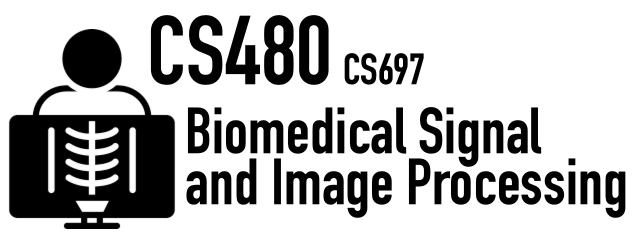
# Assignment 1


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [ ]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [ ]:
# Here we create a function to return an ECG plot which can be reused in
# Both Task 1 and future tasks.

# ecg_plot: returns a pretty ECG plot, with 1s padding
def ecg_plot(data, sr, start, end):
  fig = plt.figure()

  # slice the ECG data, with 1s padding on each end
  data = ecg[(start-1)*sr:(end+1)*sr]

  # create a time data axis coresponding to the ECG data (with padding)
  time = np.arange(data.size) / sr + (start-1)

  # set plot limits to frame data nicely between start and end
  plt.xlim(start, end)
  plt.ylim(min(data[1*sr:-1*sr]) * 1.1,
           max(data[1*sr:-1*sr]) * 1.1)

  # add nice lables and a title
  plt.xlabel('Time in s', figure=fig)
  plt.ylabel('ECG in mV', figure=fig)
  plt.title(f"Electrocardiogram data from {start}s to {end}s", figure=fig)

  # generate and return the ECG plot
  plt.plot(time, data, figure=fig)
  return fig

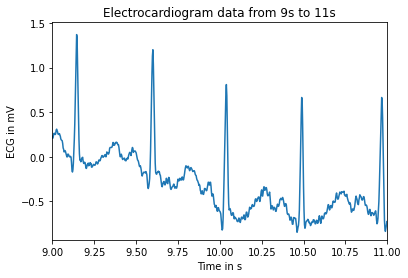

In [ ]:
# We want to plot ECG data from 9s to 11s
task1 = ecg_plot(ecg, SAMPLING_RATE, 9, 11)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [ ]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [ ]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


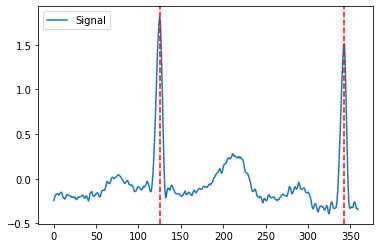

In [ ]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

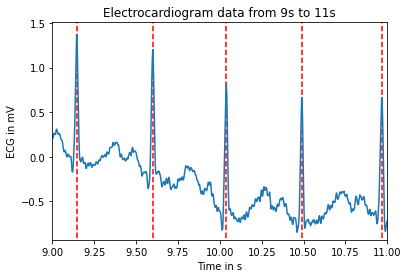

In [ ]:
# note: we use a similar plot as in Task 1, rather than nk.events_plot(...), as
# we've already put in the effort to make a pretty plot with appropriate labels

# we want peaks in seconds, to match the x-axis of our plot
peaks = rpeaks['ECG_R_Peaks'] / SAMPLING_RATE

# generate a new plot for this task with ECG data from 9s to 11s
task2 = ecg_plot(ecg, SAMPLING_RATE, 9, 11)

# add the detected R spikes
plt.vlines(peaks, -1, 2, colors='red', linestyles='dashed', figure=task2)

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [ ]:
# Based on a visual observation of the Task 2 plot (9s -- 11s), the patient
# appears to have a regular heart rate.

#  What is the patient's overall heart rate?
duration = ecg.size / SAMPLING_RATE / 60 # in seconds
bpm = peaks.size / duration # beats per minute
print(f"The patient's heartrate is {bpm} bpm.")

# But how much does this patient's heart rate actually vary?
# Let's calculate the standard deviation of the heart rate.
bpms = []
for i in range(peaks.size - 1):
  interval = peaks[i+1] - peaks[i] # duration (in s) between subsequent R spikes
  bpms.append(60 / interval) # converted to beats per minute
hr_std = numpy.round(numpy.std(bpms), 1) # standard deviation, with rounding
print(f"The standard deviation of the patient's heart rate is {hr_std} bpm.")

# Overall, a standard deviation of ~14 bpm over a 5m duration seems relatively
# stable: this suggests the patient's heart rate is regular.

The patient's heartrate is 100.6 bpm.
The standard deviation of the patient's heart rate is 13.9 bpm.


**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

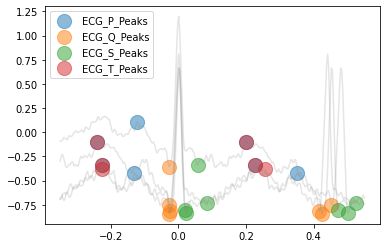

In [ ]:
# Slice ECG from 9s to 11s and generate localized rpeaks.
ecg9_11 = ecg[9*SAMPLING_RATE:11*SAMPLING_RATE +1]
_, rpeaks9_11 = nk.ecg_peaks(ecg9_11, sampling_rate=SAMPLING_RATE)

# Delineate the ECG signal and show P Q S T peaks.
_, _ = nk.ecg_delineate(ecg9_11, rpeaks9_11, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [ ]:
# TODO Does the detection work well?

# It seems to work OK.  For example, the S-T circles seem to be in the right
# places, at least when this is compared to the Task 2 plot above.  However,
# this plot is not nearly as clean is the examples in the detection tutorial.

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

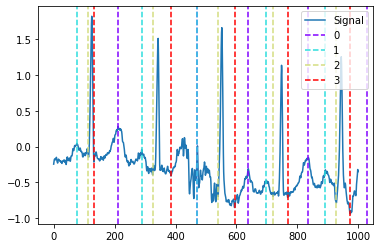

In [158]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

# Delineate the entire ECG data.
_, peaks = nk.ecg_delineate(ecg, rpeaks, sampling_rate=SAMPLING_RATE)

# Plot only the first 1000 samples / 5 peaks.
plot = nk.events_plot([peaks['ECG_T_Peaks'][:5],
                       peaks['ECG_P_Peaks'][:5],
                       peaks['ECG_Q_Peaks'][:5],
                       peaks['ECG_S_Peaks'][:5]], ecg[:1000])

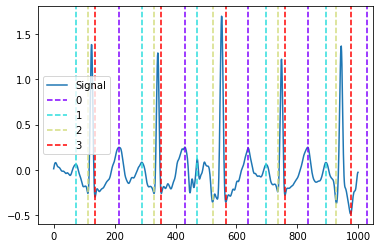

In [175]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

# Filter the ECG signal with a bandpass of 2.5hz through 25hz.
filtered_ecg = nk.signal_filter(ecg, SAMPLING_RATE, 2.5, 25)

# Delineate the entire ECG data.
_, filtered_peaks = nk.ecg_delineate(filtered_ecg, rpeaks, sampling_rate=SAMPLING_RATE)

# Plot only the first 1000 samples / 5 peaks.
plot = nk.events_plot([filtered_peaks['ECG_T_Peaks'][:5],
                       filtered_peaks['ECG_P_Peaks'][:5],
                       filtered_peaks['ECG_Q_Peaks'][:5],
                       filtered_peaks['ECG_S_Peaks'][:5]], filtered_ecg[:1000])

In [176]:
# TODO Does the filtering improve the result?

# Yes, absolutely.  The ECG signal looks for cleaner, and it's easier to see the
# various components of the waveform.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#